In [73]:
import pandas as pd
import numpy as np

# Setup
## Importing Dataset

In [74]:
crop_df = pd.read_csv('../Datasets/Cropdata.csv')
crop_df

,N,P,K,temperature,humidity,ph,rainfall,label,Family
0,90.000000,42.000000,43.000000,20.879744,82.002744,6.502985,202.935536,rice,Cereals
1,85.000000,58.000000,41.000000,21.770462,80.319644,7.038096,226.655537,rice,Cereals
2,60.000000,55.000000,44.000000,23.004459,82.320763,7.840207,263.964248,rice,Cereals
3,74.000000,35.000000,40.000000,26.491096,80.158363,6.980401,242.864034,rice,Cereals
4,78.000000,42.000000,42.000000,20.130175,81.604873,7.628473,262.717340,rice,Cereals
...,...,...,...,...,...,...,...,...,...
8595,61.805859,47.672594,97.414930,24.850300,123.487088,6.036764,196.676977,Silk (from silkworms),Commercial crops
8596,22.844938,80.668085,107.294228,24.955801,79.604883,4.774558,217.397726,Silk (from silkworms),Commercial crops
8597,43.175013,51.194571,27.759517,21.188037,47.946527,4.760295,52.777676,Silk (from silkworms),Commercial crops
8598,31.754884,-18.441935,104.397553,33.770748,45.797009,6.992872,112.977350,Silk (from silkworms),Commercial crops


In [75]:
exotic_crops_df = pd.read_csv('../Datasets/imported_crops.csv')
exotic_crops_df

,Name,K_mean,N_mean,P_mean,temperature_mean,humidity_mean,ph_mean,rainfall_mean
0,Broccoli,-0.395067,0.072551,-0.299363,-0.730196,-2.464421,-0.741455,0.391420
1,Kiwi,2.862921,1.770581,2.169387,-0.478527,-1.615034,-1.031437,-0.317673
2,Strawberry,2.785872,-0.024274,2.111003,0.211918,0.715227,0.089651,-1.090468
3,Raspberry,0.101274,1.882509,0.076741,-0.042715,-0.144162,1.672384,1.003334
4,Blackberry,1.407498,0.950132,1.066535,-0.302464,-1.020819,1.163085,-0.754451
5,Blueberry,2.357679,0.877938,1.786538,-0.130474,-0.440350,-0.535160,0.787041
6,Avocado,1.262562,1.606164,0.956710,0.060027,0.202592,-0.639949,0.842109
7,Lettuce,0.301153,-0.477937,0.228199,-0.307976,-1.039423,0.226464,2.252677
8,Celery,-0.530951,1.364232,-0.402330,-0.633418,-2.137792,0.733279,2.124691
9,"Bell peppers (Red, Yellow, Orange)",0.453253,0.235062,0.343454,0.097674,0.329650,-0.268902,-0.443299


In [76]:
local_crops_df = pd.read_csv('../Datasets/populate_data.csv')
local_crops_df

,Name,K_mean,N_mean,P_mean,temperature_mean,humidity_mean,ph_mean,rainfall_mean
0,Rice,2.589890,-0.680122,-0.739135,0.313570,1.058304,0.703327,1.395175
1,Wheat,1.225176,0.390698,-0.728476,0.004340,0.014647,1.799890,0.326655
2,Cotton,0.747869,0.391575,-0.717816,-0.368993,-1.245356,-0.164976,1.836870
3,Jute,0.037714,0.308731,-0.707157,0.019014,0.064172,-1.308706,1.988913
4,Sugarcane,0.568869,1.284250,-0.696498,-0.540578,-1.824458,0.605424,-0.663376
...,...,...,...,...,...,...,...,...
95,Safflowerseed,2.298448,0.848534,0.273503,-0.247213,-0.834347,-0.158261,1.065747
96,Deccan Hemp,-0.153785,-0.411203,0.284163,-0.166120,-0.560658,0.798191,-0.018888
97,Sunn Hemp,-0.729022,1.834669,0.294822,-0.486102,-1.640599,-0.936832,0.988271
98,Subabul,2.232904,0.323228,0.305482,-0.255178,-0.861230,-0.375688,2.050787


In [77]:
print(crop_df[crop_df['label'] == 'banana'])

          N     P     K  temperature   humidity        ph    rainfall   label  \
1000   91.0  94.0  46.0    29.367924  76.249001  6.149934   92.828409  banana   
1001  105.0  95.0  50.0    27.333690  83.676752  5.849076  101.049479  banana   
1002  108.0  92.0  53.0    27.400536  82.962213  6.276800  104.937800  banana   
1003   86.0  76.0  54.0    29.315908  80.115857  5.926825   90.109781  banana   
1004   80.0  77.0  49.0    26.054330  79.396545  5.519088  113.229737  banana   
...     ...   ...   ...          ...        ...       ...         ...     ...   
1095  108.0  94.0  47.0    27.359116  84.546250  6.387431   90.812505  banana   
1096   92.0  81.0  52.0    28.010680  76.528081  5.891414  103.704078  banana   
1097  110.0  71.0  54.0    28.672089  82.207936  5.725419   94.379875  banana   
1098   82.0  75.0  55.0    27.345851  78.487383  6.281070   92.155243  banana   
1099  117.0  81.0  53.0    29.507046  78.205856  5.507642   98.125658  banana   

     Family  
1000    NaN  

In [78]:
d1_names = set(crop_df['label'])
d2_names = set(local_crops_df['Name'])
d3_names = set(exotic_crops_df['Name'])

# Convert names in d1_names, d2_names, and d3_names to lowercase
d1_names_lower = {name.lower() for name in d1_names}
d2_names_lower = {name.lower() for name in d2_names}
d3_names_lower = {name.lower() for name in d3_names}

# Find the set difference: names in d1 that are not in d2 or d3
names_in_d1_not_in_d2_or_d3 = d1_names_lower - d2_names_lower - d3_names_lower

# Print the names
print(names_in_d1_not_in_d2_or_d3)

{'mungbean', 'mung beans', 'chickpeas', 'lentils', 'chickpea', 'strawberries', 'kidneybeans', 'pearl millet', 'opium poppy (for pharmaceuticals)', 'radish', 'sesame', 'bananas', 'foxtail millet', 'gourds', 'finger millet', 'almonds', 'berries', 'tomatoes', 'onions', 'potatoes', 'papayas', 'maize (corn)', 'guavas', 'soybean', 'walnuts', 'pigeon peas', 'citrus fruits', 'mothbeans', 'cashew nuts', 'chili', 'silk (from silkworms)', 'blackgram', 'garlic', 'pomegranates', 'pineapples', 'eggplant (brinjal)', 'turnips', 'betel nuts', 'pistachios', 'tobacco', 'cabbage', 'carrots', 'watermelons', 'apples', 'mangoes', 'pumpkins', 'cocoa (for chocolate)', 'cucumbers', 'pigeonpeas', 'okra (ladyfinger)', 'muskmelons', 'saffron'}


# Implementing UCB

In [91]:
def calculate_weighted_rewards(data, farmer_preferences):
    # Calculate weighted reward
    data['weighted_reward'] = (
        data['K_mean'] * farmer_preferences['K_mean'] +
        data['N_mean'] * farmer_preferences['N_mean'] +
        data['P_mean'] * farmer_preferences['P_mean'] +
        data['temperature_mean'] * farmer_preferences['temperature_mean'] +
        data['humidity_mean'] * farmer_preferences['humidity_mean'] +
        data['ph_mean'] * farmer_preferences['ph_mean'] +
        data['rainfall_mean'] * farmer_preferences['rainfall_mean']
    )
    
    # Normalize the weighted reward to be in the range [0,1]
    max_reward = data['weighted_reward'].max()
    data['normalized_reward'] = data['weighted_reward'] / max_reward
    
    return data


In [94]:
farmer_preferences = {
    'K_mean': -2,
    'N_mean': -1,
    'P_mean': 0.3,
    'temperature_mean': -1.1,
    'humidity_mean': -0.2,
    'ph_mean': 1,
    'rainfall_mean': 2,
}
local_crops_df_updated = calculate_weighted_rewards(local_crops_df, farmer_preferences)
exotic_crops_df_updated = calculate_weighted_rewards(exotic_crops_df, farmer_preferences)


print(local_crops_df_updated['normalized_reward'].min())
local_crops_df_updated

-0.9094521760039852


,Name,K_mean,N_mean,P_mean,temperature_mean,humidity_mean,ph_mean,rainfall_mean,weighted_reward,normalized_reward
0,Rice,2.589890,-0.680122,-0.739135,0.313570,1.058304,0.703327,1.395175,-1.784309,-0.188875
1,Wheat,1.225176,0.390698,-0.728476,0.004340,0.014647,1.799890,0.326655,-0.614096,-0.065004
2,Cotton,0.747869,0.391575,-0.717816,-0.368993,-1.245356,-0.164976,1.836870,2.061071,0.218171
3,Jute,0.037714,0.308731,-0.707157,0.019014,0.064172,-1.308706,1.988913,2.039063,0.215841
4,Sugarcane,0.568869,1.284250,-0.696498,-0.540578,-1.824458,0.605424,-0.663376,-2.392738,-0.253279
...,...,...,...,...,...,...,...,...,...,...
95,Safflowerseed,2.298448,0.848534,0.273503,-0.247213,-0.834347,-0.158261,1.065747,-2.951340,-0.312408
96,Deccan Hemp,-0.153785,-0.411203,0.284163,-0.166120,-0.560658,0.798191,-0.018888,1.859302,0.196813
97,Sunn Hemp,-0.729022,1.834669,0.294822,-0.486102,-1.640599,-0.936832,0.988271,1.614362,0.170885
98,Subabul,2.232904,0.323228,0.305482,-0.255178,-0.861230,-0.375688,2.050787,-0.518564,-0.054892


In [95]:
def ucb_algorithm(data, budget, alpha):
    import numpy as np
    
    total_crops = len(data)  # Number of crops in the dataset
    num_selections = np.zeros(total_crops)  # Number of times each crop is selected
    sums_of_rewards = np.zeros(total_crops)  # Sum of rewards for each crop
    ucb_values = np.zeros(total_crops)  # UCB values for each crop

    # UCB algorithm
    for round_num in range(1, budget + 1):
        # Calculate UCB values
        for crop_index in range(total_crops):
            if num_selections[crop_index] == 0:
                ucb_values[crop_index] = np.inf  # Initial exploration (infinity)
            else:
                avg_reward = sums_of_rewards[crop_index] / num_selections[crop_index]
                delta_i = alpha * np.sqrt((np.log(round_num)) / num_selections[crop_index])
                ucb_values[crop_index] = avg_reward + delta_i

        # Select the crop with the highest UCB value
        crop_selected = np.argmax(ucb_values)
        # Get the normalized reward for the selected crop
        normalized_reward = data.loc[crop_selected, 'normalized_reward']
        
        # Shift and scale normalized reward from [-1, 1] to [0, 1]
        reward = (normalized_reward + 1) / 2

        # Update the selections and rewards
        num_selections[crop_selected] += 1
        sums_of_rewards[crop_selected] += reward

    # Prepare the output: crop indices and associated UCB values
    top_crops_indices = np.argsort(-ucb_values)
    result = [(index, ucb_values[index]) for index in top_crops_indices]
    
    return result


In [103]:
# Apply the UCB algorithm to local crops and imported crops
local_results = ucb_algorithm(local_crops_df_updated,10000,2)
imported_results = ucb_algorithm(exotic_crops_df_updated,10000,2)

# Separate the results into indices and values
local_top_indices, local_ucb_values = zip(*local_results)
imported_top_indices, imported_ucb_values = zip(*imported_results)

# Get the top 4 local crops and top 1 imported crop
top_4_local_crops_indices = local_top_indices[:4]
top_1_imported_crop_index = imported_top_indices[0]

# Display the top 4 local crops and 1 imported crop with their UCB values
print("\nTop 4 local crops based on UCB algorithm and farmer's preferences:")
for i in range(4):
    index = top_4_local_crops_indices[i]
    name = local_crops_df_updated.iloc[index]['Name']
    weighted_reward = local_crops_df_updated.iloc[index]['weighted_reward']
    ucb_value = local_ucb_values[i]
    print(f"Crop {i+1}: {name}, UCB Value: {ucb_value}")

print("\nTop 1 imported crop based on UCB algorithm and farmer's preferences:")
imported_index = top_1_imported_crop_index
imported_name = exotic_crops_df_updated.iloc[imported_index]['Name']
imported_weighted_reward = exotic_crops_df_updated.iloc[imported_index]['weighted_reward']
imported_ucb_value = imported_ucb_values[0]
print(f"Name: {imported_name}, UCB Value: {imported_ucb_value}")



Top 4 local crops based on UCB algorithm and farmer's preferences:
Crop 1: Amla, UCB Value: 1.1945701885557085
Crop 2: Arhar, UCB Value: 1.1945616705387252
Crop 3: Asparagus, UCB Value: 1.1945255039110578
Crop 4: Black pepper, UCB Value: 1.1945126016893872

Top 1 imported crop based on UCB algorithm and farmer's preferences:
Name: Celery, UCB Value: 1.0887912040300025


In [104]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [105]:
def plot_ucb_relations(local_crops_df, imported_crops_df):
    # Define the budget and alpha values
    budgets = [2000, 4000, 6000, 8000, 10000]
    alphas = [0.4, 0.8, 1.2, 1.6, 2.0]

    # Initialize lists to store UCB values for local and imported crops
    ucb_values_local = []
    ucb_values_imported = []

    # Iterate over each budget and alpha combination
    for budget in budgets:
        for alpha in alphas:
            # Apply UCB algorithm for local and imported crops
            local_results = ucb_algorithm(local_crops_df, budget, alpha)
            imported_results = ucb_algorithm(imported_crops_df, budget, alpha)

            # Collect UCB values for the top local crop and top imported crop
            ucb_values_local.append(local_results[0][1])
            ucb_values_imported.append(imported_results[0][1])

    # Convert the collected UCB values into numpy arrays
    ucb_values_local = np.array(ucb_values_local).reshape(len(alphas), len(budgets))
    ucb_values_imported = np.array(ucb_values_imported).reshape(len(alphas), len(budgets))

    # Create a 3D plot to visualize the relationship between budget, alpha, and UCB values
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Create a meshgrid for the budget and alpha values
    B, A = np.meshgrid(budgets, alphas)

    # Plot the UCB values for local crops
    surf_local = ax.plot_surface(B, A, ucb_values_local, cmap='viridis', alpha=0.6)
    # Plot the UCB values for imported crops
    surf_imported = ax.plot_surface(B, A, ucb_values_imported, cmap='plasma', alpha=0.6)

    # Set labels and title
    ax.set_xlabel('Budget')
    ax.set_ylabel('Alpha')
    ax.set_zlabel('UCB Value')

    # Add a colorbar to better visualize the colormaps
    fig.colorbar(surf_local, ax=ax, label='Local Crops UCB Value')
    fig.colorbar(surf_imported, ax=ax, label='Imported Crops UCB Value')

    # Show the plot
    plt.show()

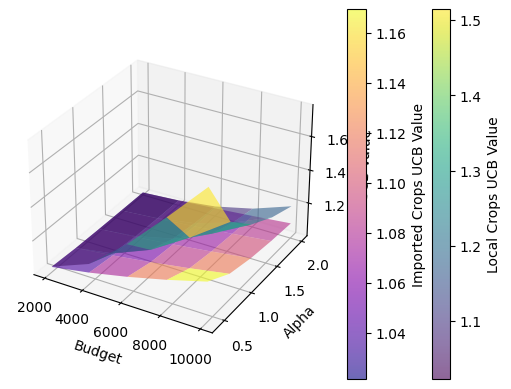

In [106]:
plot_ucb_relations(local_crops_df_updated, exotic_crops_df_updated)

In [109]:
def plot_alpha_vs_ucb(local_crops_df, imported_crops_df):
    # Define alpha values and budget
    alphas = [0.4, 0.8, 1.2, 1.6, 2.0]
    budget = 10000  # You can adjust the budget as needed

    # Initialize lists to store UCB values for local and imported crops
    ucb_values_local = []
    ucb_values_imported = []

    # Iterate over each alpha value
    for alpha in alphas:
        # Apply UCB algorithm for local and imported crops
        local_results = ucb_algorithm(local_crops_df, budget, alpha)
        imported_results = ucb_algorithm(imported_crops_df, budget, alpha)

        # Collect UCB values for the top local crop and top imported crop
        ucb_values_local.append(local_results[0][1])
        ucb_values_imported.append(imported_results[0][1])

    # Create a 2D plot to visualize the relationship between alpha and UCB values
    plt.figure()
    
    # Plot UCB values for local crops
    plt.plot(alphas, ucb_values_local, marker='o', label='Local Crops')
    
    # Plot UCB values for imported crops
    plt.plot(alphas, ucb_values_imported, marker='s', label='Imported Crops')

    # Set labels and title
    plt.xlabel('Alpha')
    plt.ylabel('UCB Value')
    plt.title('Relation between Alpha and UCB Value')

    # Add a legend for the two different data sources
    plt.legend()

    # Show the plot
    plt.show()


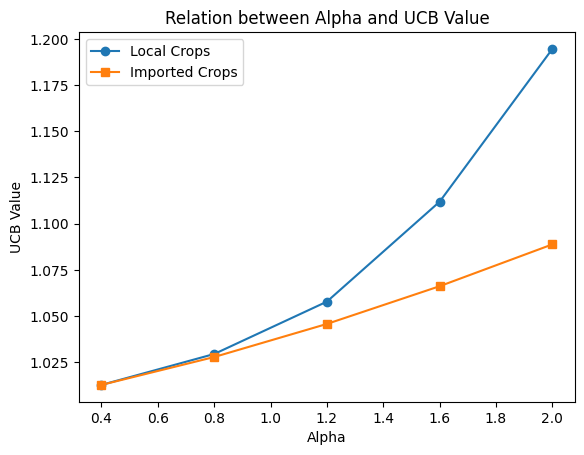

In [110]:
plot_alpha_vs_ucb(local_crops_df_updated, exotic_crops_df_updated)